In [1]:

# %pip install kaggle
# %pip install seaborn
# %pip install scipy
import kaggle as kg
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s


In [2]:
## In above lines, I have imported the necessary libraries for the project.

In [3]:
os.environ['KAGGLE_USERNAME'] = "adityasharma2295"
os.environ['KAGGLE_KEY'] = "57ccc738816b4976450b593211d11d05"

In [4]:
## In above lines, I have set the environment variables for the Kaggle API.

In [5]:
kg.api.authenticate()

In [6]:
## In above lines, I have set the environment variables for the Kaggle API.

In [7]:
kg.api.dataset_download_files(dataset="ehtishamsadiq/uncleaned-laptop-price-dataset",
                              path="./dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset


In [8]:
## In above lines, I have downloaded the dataset from Kaggle.

In [9]:
data = pd.read_csv("dataset/laptopData.csv")

In [10]:
## In above lines, I have read the dataset into a pandas dataframe using the read_csv function.

In [ ]:
data.head()

Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [12]:
## In above lines, I have displayed the first 5 rows of the dataset.

In [ ]:
data.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [14]:
## In above lines, I have checked the missing values in the dataset using the isna() function and
#  sum() function.

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
## In above lines, I have removed the missing values from the dataset using the dropna() function.

In [ ]:
data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [18]:
## In above lines, I have re-checked the missing values in the dataset using the isna() function and
#  sum() function.

In [19]:
data.drop(labels=data.columns[0],axis=1,inplace=True)

In [20]:
## In above lines, I have removed the first column from the dataset using the drop() function.

In [21]:
def label_encode_column(column_name):

    data[column_name].unique()

    d = dict()
    for value in data[column_name].unique():
        d[value] = data[data[column_name] == value][data.columns[-1]].mean()

    input_target_df = pd.DataFrame(data={column_name:d.keys(),"Mean Price":d.values()})
    input_target_df.sort_values(by="Mean Price",inplace=True)
    input_target_df.reset_index(inplace=True,drop=True)

    data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),
                              value=list(input_target_df.index)).infer_objects(copy=False)

In [22]:
## In above lines, need explanation

In [23]:
categorical_columns = list(data.columns[0:2]) + list(data.columns[3:5]) + list(data.columns[6:9])

In [24]:
## In above lines, I have created a list of categorical columns in the dataset.

In [25]:
categorical_columns

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [26]:
for column_name in categorical_columns:

    label_encode_column(column_name)

/tmp/ipykernel_10034/930716832.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),


In [27]:
## In above lines, I have encoded the categorical columns in the dataset using the label_encode_column() function.

In [ ]:
data

Company  TypeName Inches  ScreenResolution  Cpu   Ram  Memory  Gpu  \
0          13         3   13.3                26   85   8GB      14   80   
1          13         3   13.3                13   64   8GB      13   45   
2           5         1   15.6                15   58   8GB      21   54   
3          13         3   15.4                36  111  16GB      31   95   
4          13         3   13.3                26   99   8GB      21   84   
...       ...       ...    ...               ...  ...   ...     ...  ...   
1298        6         2     14                16   77   4GB      14   47   
1299        6         2   13.3                22   77  16GB      31   47   
1300        6         1     14                 4   16   2GB       6    6   
1301        5         1   15.6                 4   77   6GB      12   32   
1302        7         1   15.6                 4   16   4GB       9    6   

      OpSys  Weight        Price  
0         8  1.37kg   71378.6832  
1         8  1.34kg   47895.5232  
2         2  1.86kg   30636.0000  
3         8  1.83kg  135195.3360  
4         8  1.37kg   96095.8080  
...     ...     ...          ...  
1298      4   1.8kg   33992.6400  
1299      4   1.3kg   79866.7200  
1300      4   1.5kg   12201.1200  
1301      4  2.19kg   40705.9200  
1302      4   2.2kg   19660.3200  

[1273 rows x 11 columns]

In [29]:
data["Ram"] = data["Ram"].apply(lambda x: float(x.split("GB")[0]))

In [30]:
## In above line, I have converted the Ram column into float type.

In [31]:
data

Company  TypeName Inches  ScreenResolution  Cpu   Ram  Memory  Gpu  \
0          13         3   13.3                26   85   8.0      14   80   
1          13         3   13.3                13   64   8.0      13   45   
2           5         1   15.6                15   58   8.0      21   54   
3          13         3   15.4                36  111  16.0      31   95   
4          13         3   13.3                26   99   8.0      21   84   
...       ...       ...    ...               ...  ...   ...     ...  ...   
1298        6         2     14                16   77   4.0      14   47   
1299        6         2   13.3                22   77  16.0      31   47   
1300        6         1     14                 4   16   2.0       6    6   
1301        5         1   15.6                 4   77   6.0      12   32   
1302        7         1   15.6                 4   16   4.0       9    6   

      OpSys  Weight        Price  
0         8  1.37kg   71378.6832  
1         8  1.34kg   47895.5232  
2         2  1.86kg   30636.0000  
3         8  1.83kg  135195.3360  
4         8  1.37kg   96095.8080  
...     ...     ...          ...  
1298      4   1.8kg   33992.6400  
1299      4   1.3kg   79866.7200  
1300      4   1.5kg   12201.1200  
1301      4  2.19kg   40705.9200  
1302      4   2.2kg   19660.3200  

[1273 rows x 11 columns]

(array([397., 280., 125., 111.,  94.,  79.,  68.,  38.,  49.,  32.]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <BarContainer object of 10 artists>)

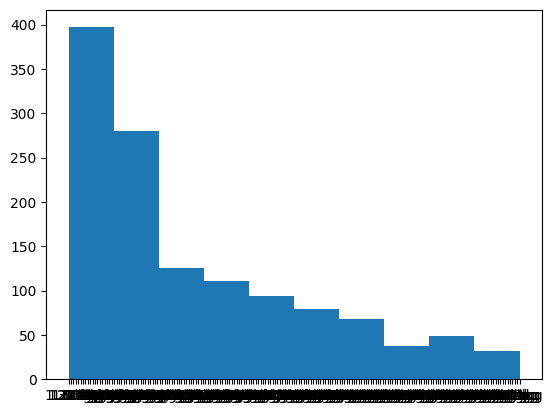

In [32]:
plt.hist(data["Weight"])

In [33]:
## In above line, I have converted the Ram column into float type.

In [34]:
data["Weight"].value_counts().index[0]

'2.2kg'

In [35]:
## In above line, I extracted the most frequent value from the Weight column.

In [36]:
data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_10034/322094499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],


In [37]:
## In above line, I replaced the missing values in the Weight column with the most frequent value.

In [38]:
data["Weight"] = data["Weight"].apply(lambda x: float(x.split("kg")[0]))

In [39]:
## In above line, I converted the Weight column into float type by removing the "kg" string.

In [40]:
data

Company  TypeName Inches  ScreenResolution  Cpu   Ram  Memory  Gpu  \
0          13         3   13.3                26   85   8.0      14   80   
1          13         3   13.3                13   64   8.0      13   45   
2           5         1   15.6                15   58   8.0      21   54   
3          13         3   15.4                36  111  16.0      31   95   
4          13         3   13.3                26   99   8.0      21   84   
...       ...       ...    ...               ...  ...   ...     ...  ...   
1298        6         2     14                16   77   4.0      14   47   
1299        6         2   13.3                22   77  16.0      31   47   
1300        6         1     14                 4   16   2.0       6    6   
1301        5         1   15.6                 4   77   6.0      12   32   
1302        7         1   15.6                 4   16   4.0       9    6   

      OpSys  Weight        Price  
0         8    1.37   71378.6832  
1         8    1.34   47895.5232  
2         2    1.86   30636.0000  
3         8    1.83  135195.3360  
4         8    1.37   96095.8080  
...     ...     ...          ...  
1298      4    1.80   33992.6400  
1299      4    1.30   79866.7200  
1300      4    1.50   12201.1200  
1301      4    2.19   40705.9200  
1302      4    2.20   19660.3200  

[1273 rows x 11 columns]

In [41]:
data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_10034/3364775625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],


In [42]:
## In above line, I replaced the missing values in the Inches column with the most frequent value.

In [43]:
data["Inches"] = data["Inches"].astype("float64")

In [44]:
## In above line, I converted the Inches column into float type.

In [45]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [46]:
## In above line, I removed the duplicate rows from the dataset.

In [47]:
data.shape

(1244, 11)

In [ ]:
data.corr()

Company  TypeName    Inches  ScreenResolution       Cpu  \
Company           1.000000  0.380727  0.056701          0.195862  0.366558   
TypeName          0.380727  1.000000  0.082703          0.408487  0.616323   
Inches            0.056701  0.082703  1.000000         -0.004989  0.114358   
ScreenResolution  0.195862  0.408487 -0.004989          1.000000  0.580091   
Cpu               0.366558  0.616323  0.114358          0.580091  1.000000   
Ram               0.284032  0.478408  0.142681          0.460743  0.582952   
Memory            0.313719  0.505274  0.057377          0.599128  0.690292   
Gpu               0.346871  0.622090  0.158345          0.499001  0.790363   
OpSys             0.137470  0.176254 -0.017422          0.203573  0.274365   
Weight            0.037629  0.222784  0.490828          0.001927  0.223038   
Price             0.350938  0.610118  0.042767          0.630240  0.751906   

                       Ram    Memory       Gpu     OpSys    Weight     Price  
Company           0.284032  0.313719  0.346871  0.137470  0.037629  0.350938  
TypeName          0.478408  0.505274  0.622090  0.176254  0.222784  0.610118  
Inches            0.142681  0.057377  0.158345 -0.017422  0.490828  0.042767  
ScreenResolution  0.460743  0.599128  0.499001  0.203573  0.001927  0.630240  
Cpu               0.582952  0.690292  0.790363  0.274365  0.223038  0.751906  
Ram               1.000000  0.626335  0.527600  0.095428  0.286223  0.681922  
Memory            0.626335  1.000000  0.598845  0.227013  0.132312  0.725986  
Gpu               0.527600  0.598845  1.000000  0.250605  0.265934  0.731752  
OpSys             0.095428  0.227013  0.250605  1.000000 -0.044472  0.296438  
Weight            0.286223  0.132312  0.265934 -0.044472  1.000000  0.176399  
Price             0.681922  0.725986  0.731752  0.296438  0.176399  1.000000

In [49]:
## In above line, I calculated the correlation matrix for the dataset.

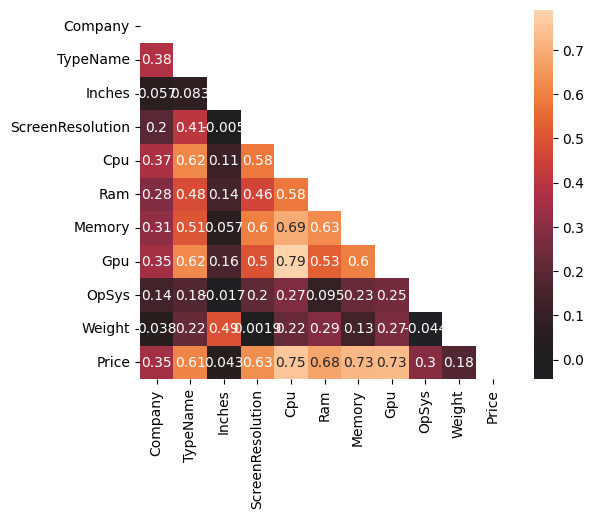

In [50]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [51]:
## In above lines, I have plotted the heatmap for the correlation matrix.

In [52]:
(data.corr().loc["Price"]>0.5) #loc is used to access a group of rows and columns by labels or a boolean array

Company             False
TypeName             True
Inches              False
ScreenResolution     True
Cpu                  True
Ram                  True
Memory               True
Gpu                  True
OpSys               False
Weight              False
Price                True
Name: Price, dtype: bool

In [53]:
selected_features = ["TypeName","Ram","Memory","Cpu","ScreenResolution","Gpu","Price"]

In [54]:
## In above lines, I have selected the features based on the correlation matrix. 

In [55]:
refined_data = data[selected_features]

In [ ]:
refined_data

TypeName   Ram  Memory  Cpu  ScreenResolution  Gpu        Price
0            3   8.0      14   85                26   80   71378.6832
1            3   8.0      13   64                13   45   47895.5232
2            1   8.0      21   58                15   54   30636.0000
3            3  16.0      31  111                36   95  135195.3360
4            3   8.0      21   99                26   84   96095.8080
...        ...   ...     ...  ...               ...  ...          ...
1239         1   4.0       9   77                 4   29   38378.6496
1240         2   4.0      14   77                16   47   33992.6400
1241         2  16.0      31   77                22   47   79866.7200
1242         1   2.0       6   16                 4    6   12201.1200
1243         1   6.0      12   77                 4   32   40705.9200

[1244 rows x 7 columns]

In [57]:
x_transpose=np.array(refined_data.iloc[:,0:6])
y=np.array(refined_data.iloc[:,-1]).reshape(refined_data.shape[0],1)

(array([438., 435., 225.,  95.,  36.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

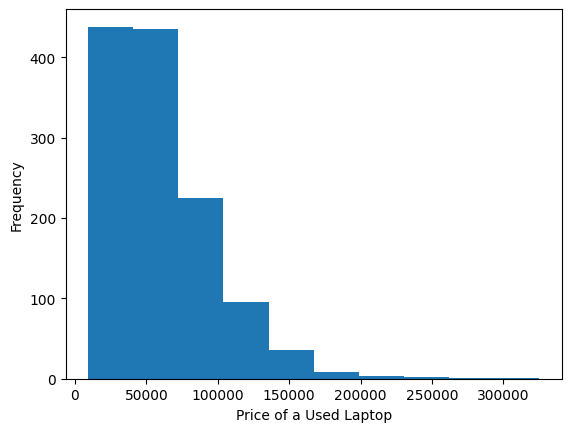

In [58]:
plt.xlabel("Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(y)

/tmp/ipykernel_10034/4126059115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,fit=s.norm)


<Axes: xlabel='Price of a Used Laptop', ylabel='Density'>

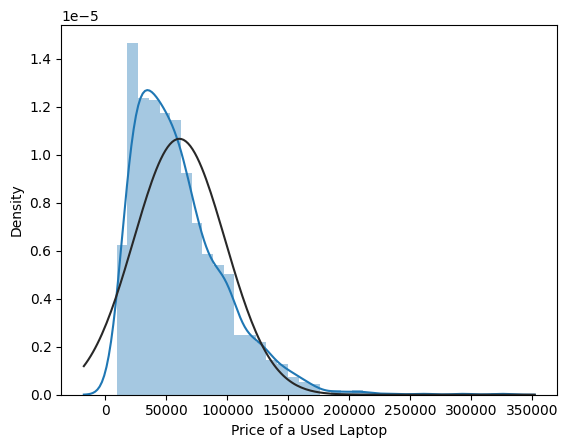

In [59]:
plt.xlabel("Price of a Used Laptop")
sns.distplot(y,fit=s.norm)

(array([ 14.,  72., 142., 178., 249., 263., 208.,  97.,  17.,   4.]),
 array([ 9.13461633,  9.49029881,  9.84598129, 10.20166377, 10.55734625,
        10.91302873, 11.26871121, 11.62439369, 11.98007617, 12.33575865,
        12.69144113]),
 <BarContainer object of 10 artists>)

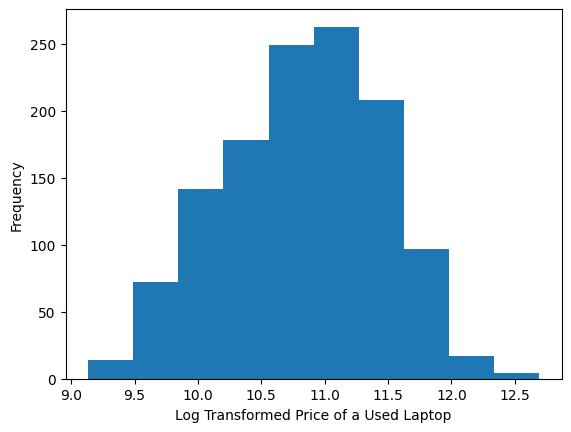

In [60]:
plt.xlabel("Log Transformed Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(np.log(y))

/tmp/ipykernel_10034/428199229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y),fit=s.norm)


<Axes: xlabel='Log Transformed Price of a Used Laptop', ylabel='Density'>

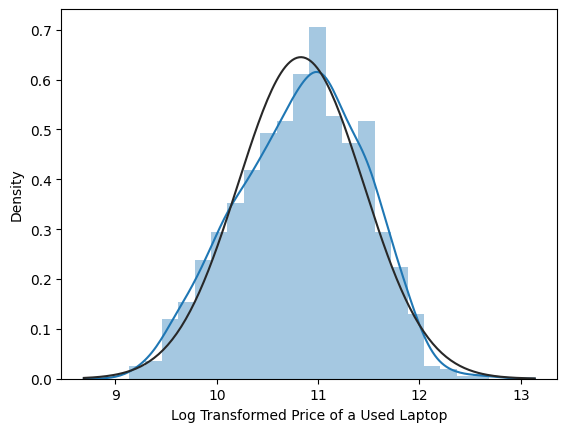

In [61]:
plt.xlabel("Log Transformed Price of a Used Laptop")
sns.distplot(np.log(y),fit=s.norm)

In [62]:
y = np.log(y)

In [63]:
y.shape

(1244, 1)

In [64]:
def mse(theta0, theta):
    
    return np.mean((y - (np.matmul(x_transpose, theta) + theta0))**2)
#matmul is used to multiply two matrices 

In [65]:
def del_mse_by_del_theta(theta0,theta):

    error_transpose = np.transpose((theta0 + np.matmul(x_transpose,theta) - y))

    del_by_del_theta0 = np.mean(error_transpose)
    del_by_del_theta = (1/y.shape[0])*np.transpose(np.matmul(error_transpose,x_transpose))

    return [del_by_del_theta0,del_by_del_theta]

In [66]:
epsilon = 10**(-4)
epoch_counter = 0
theta0_initial = 0
theta_initial = np.zeros((x_transpose.shape[1],1))
tol = 10**(-5)

while True:

    initial_gradients = del_mse_by_del_theta(theta0_initial,theta_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta_final = theta_initial - (epsilon * initial_gradients[1])

    mse_initial_value = mse(theta0_initial,theta_initial)
    mse_final_value = mse(theta0_final,theta_final)

    if abs(mse_initial_value - mse_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta_initial = theta_final

    print("Epoch # {}, MSE Value = {}".format(epoch_counter,mse_initial_value))

Epoch # 1, MSE Value = 117.66687805495101
Epoch # 2, MSE Value = 14.709066913028384
Epoch # 3, MSE Value = 12.066198730950365
Epoch # 4, MSE Value = 11.972015791007061
Epoch # 5, MSE Value = 11.943187165452763
Epoch # 6, MSE Value = 11.916619044055903
Epoch # 7, MSE Value = 11.890693343611549
Epoch # 8, MSE Value = 11.865353910905572
Epoch # 9, MSE Value = 11.840584669387272
Epoch # 10, MSE Value = 11.81637095236759
Epoch # 11, MSE Value = 11.792698510236209
Epoch # 12, MSE Value = 11.76955347490809
Epoch # 13, MSE Value = 11.746922348865708
Epoch # 14, MSE Value = 11.724791995099856
Epoch # 15, MSE Value = 11.703149627339705
Epoch # 16, MSE Value = 11.681982800549326
Epoch # 17, MSE Value = 11.661279401683032
Epoch # 18, MSE Value = 11.641027640692476
Epoch # 19, MSE Value = 11.62121604177863
Epoch # 20, MSE Value = 11.601833434882
Epoch # 21, MSE Value = 11.582868947404487
Epoch # 22, MSE Value = 11.564311996156711
Epoch # 23, MSE Value = 11.546152279524502
Epoch # 24, MSE Value = 11

In [68]:
theta0_final

np.float64(7.429403443580421)

In [69]:
theta_final

array([[-0.01715351],
       [-0.00995831],
       [ 0.05290562],
       [ 0.02584959],
       [ 0.02383538],
       [ 0.00568133]])